![land before time](images/Cast-of-the-land-before-time-5.jpg)

![jurrasic park](images/jurassic_park.jpeg)

# Introduction 
For my project I decided to go with the pbdb and for my clade I decided to go with dinosauria. I decided to go with dinosaurs because ever since I was little and watched the Land Before Time I was fascinated by dinosaurs. Eventually when I was a little older I watched Jurassic Park and the fascination gripped me again. The interest eventually faded but I figured choosing the dinosaur clade would be a fun way to actually learn about the science behind the clade. 

# Question 

One question that researchers are trying to answer is whether dinosaurs are cold-blooded (ectotherms), warm-blooded (endotherms), or intermediate-blooded (mesotherms). One interesting way I thought to test this was by looking at the distribution of the species across the world map. According to my theory if dinosaurs were ectotherms you would expect them to be located more towards the equator or warmer regions. You can see the the distribution on the world map below. One thing I did not account for is that the temperature 100 million year ago was a lot warmer meaning that the dinosaurs could be a lot more spread. However, it is interesting to see that you do not see them near the very top or bottom of the map where it would be cold. 


![world map](images/world_map)

## Code to separate longitude and latitude 

```
in_file = open("edited-long-lat.csv")
#output = open("output_lat_long.csv", "w")
output_lat= open("output_lat.csv", "w")
output_long = open("output_long.csv", "w")

lat = []
long = []

for line in in_file:
    temp_lats = line.split('","')[17]
    temp_longs = line.split('","')[16]
    outline1 = "{}\n".format(temp_lats)
    outline2 = "{}\n".format(temp_longs)

    #lat.append(float(temp_lats))
    #long.append(float(temp_lons))
    output_lat.write(outline1)
    output_long.write(outline2)
output_lat.close()
output_long.close()
```

## code from R to create graphs 

```
library(ggplot2)
library(maps)

world_map <- map_data("world")

plot <- ggplot() + coord_fixed() +
  xlab("") + ylab("")


actual_world <- plot + geom_polygon(data=world_map, aes(x=long, y=lat, group=group), colour="black", fill="white")

actual_world
#reading in my longitude data and latitude data
dino <- read.csv("/home/eeb177-student/Desktop/eeb-177/final-project/long-lat/output_lat_long.csv", header = T, as.is = T)
names(dino)<- c("lat", "long")

map_data <- actual_world + geom_point(data=dino,aes(x=long, y=lat), colour="Blue",pch=2, size=0.1, alpha=I(1)) + labs(title = "Fossil Records on World Map", x = "Longitude", y = "Latitude") + theme(plot.title = element_text(hjust = 0.5, size=18, face = "bold"), axis.title =element_text(size=10))

map_data

```

# code demonstration 

The first dinosaurs appeared in the Late Triassic period which is about 230 million years ago, During the Early Jurassic period (about 30 million years later) dinosaurs were diversifying rapidly. The Late Jurassic (about 145 million years ago) through the Late Cretaceous (about 65 million years ago) is considered the peak time for dinosaurs. I was interested in tracking the species diversity during the different time periods so using matplotlib I created a graph to show the number of species during each time period. 

In [3]:

def dino_time_period_graph(filename):
    dino_data= open(filename, "r", encoding = "ISO-8859-1")
    alldata=dino_data.readlines() [18:] 
    Timeperiod_dict = {} 
    for line in alldata:
        record_elements = line.split(",") 
        Timeperiod = record_elements[12] 
        if Timeperiod in Timeperiod_dict: 
            count = Timeperiod_dict[Timeperiod] 
            Timeperiod_dict[Timeperiod] = count + 1 
        else: 
            Timeperiod_dict[Timeperiod] = 1  
    return Timeperiod_dict



In [5]:
print(dino_time_period_graph("Dinosauria.csv"))

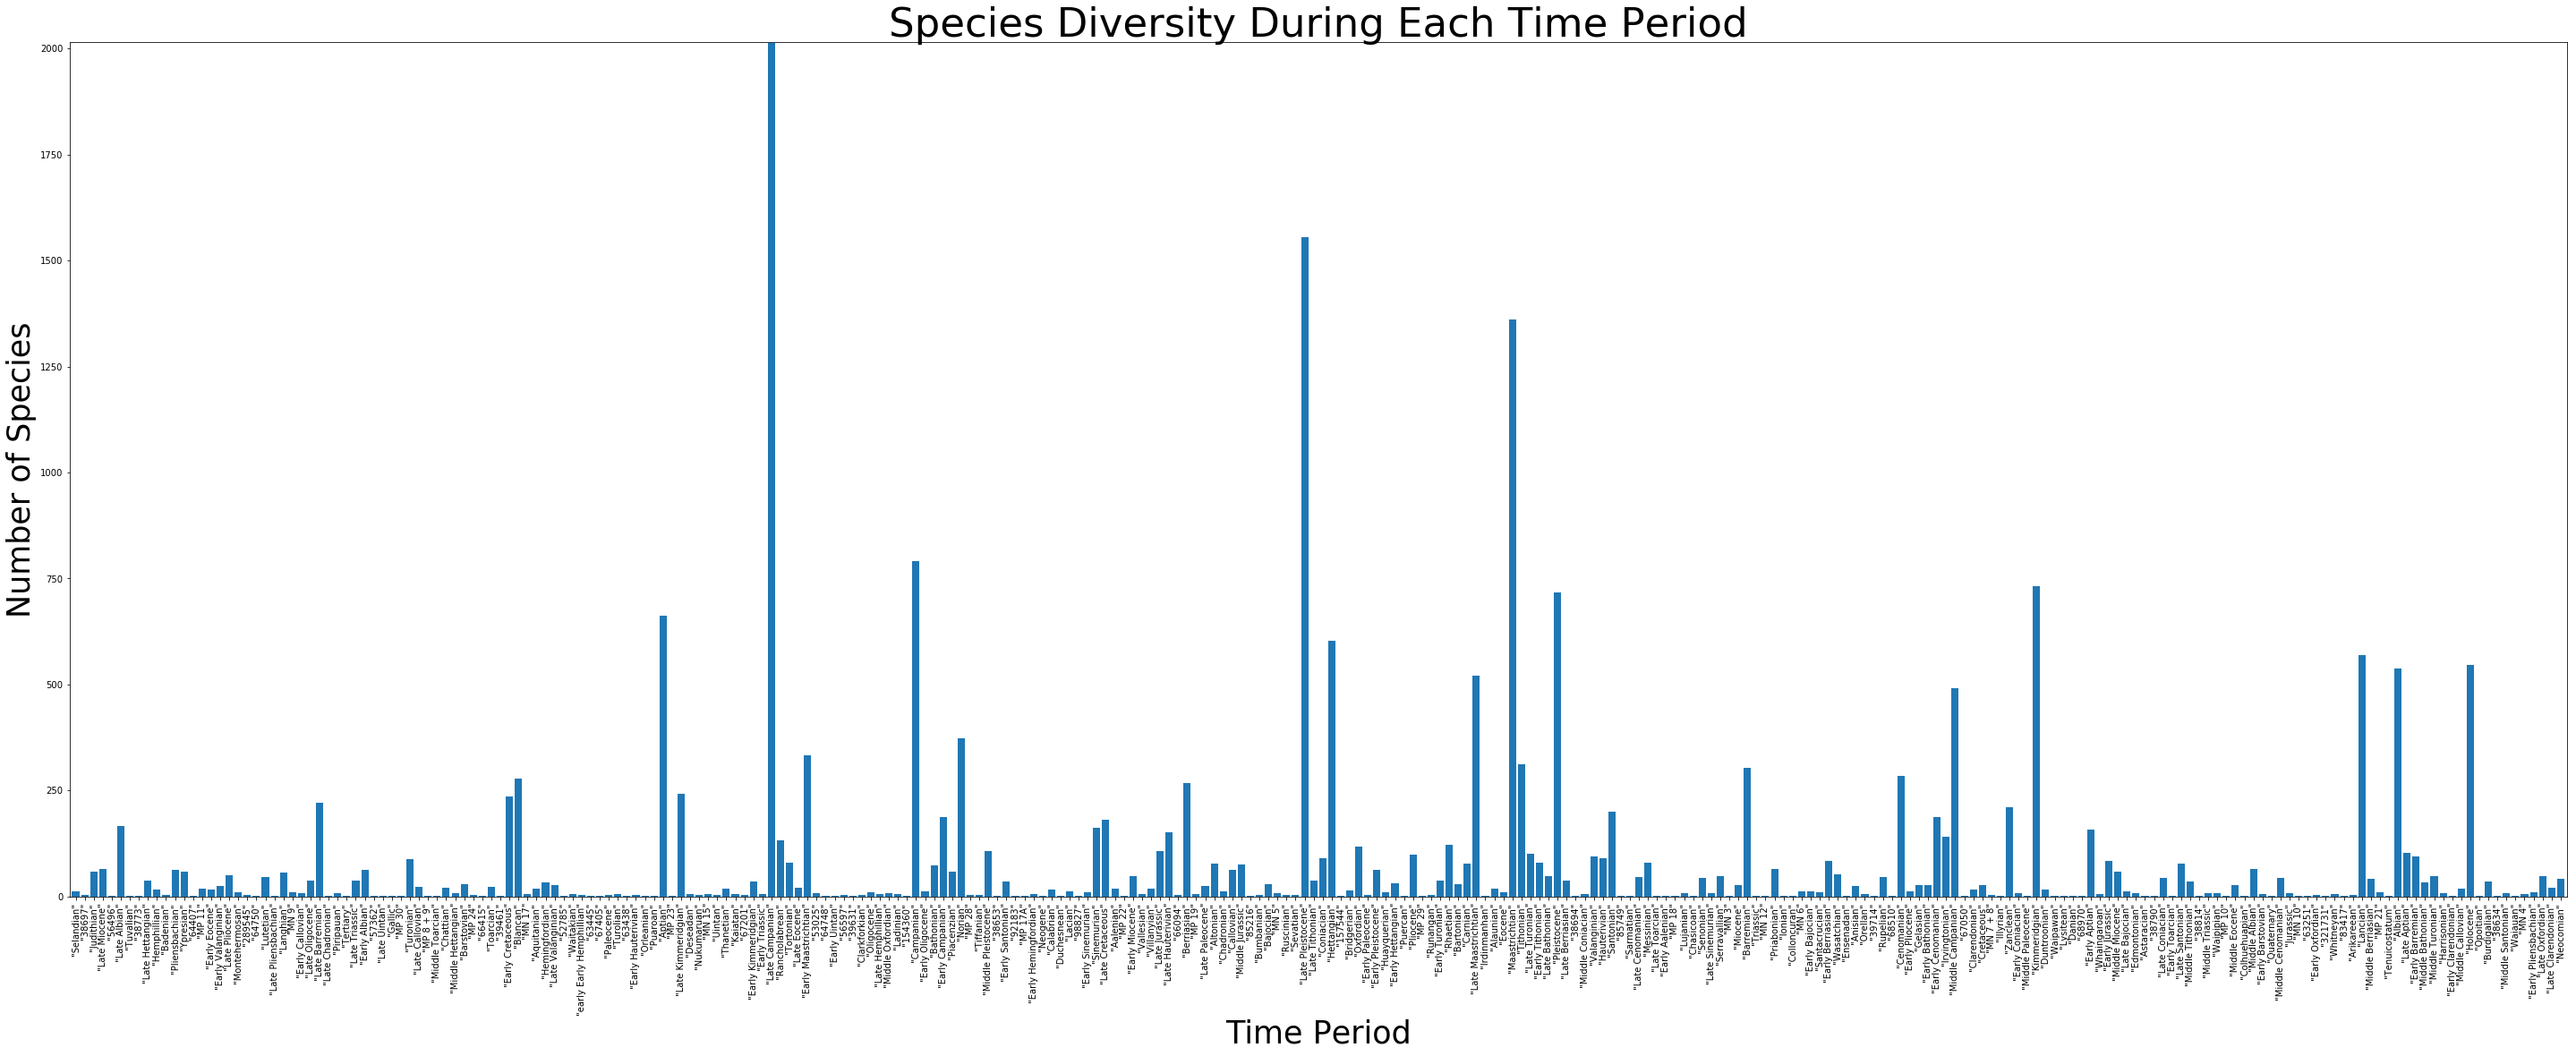

In [27]:
import matplotlib.pyplot as plot
plot.figure(figsize=(50,17))
plot.bar(range(len(dino_time_period_graph("Dinosauria.csv"))), dino_time_period_graph("Dinosauria.csv").values(), align='center')
plot.xticks(range(len(dino_time_period_graph("Dinosauria.csv"))), list(dino_time_period_graph("Dinosauria.csv").keys()), rotation = 'vertical')
plot.margins(0.001)
plot.subplots_adjust(bottom=0.1)
plot.title('Species Diversity During Each Time Period', fontsize = 45)
plot.xlabel('Time Period', fontsize = 35)
plot.ylabel('Number of Species', fontsize = 35)

plot.show()

## Problems 

One large problem I faced was that there is a huge number of species meaning that formatting graphs and data was a little bit difficult as seen from the stratagraph seen below.

## Fun Additional Graphs and Useful Information 

![fossil occurences](images/Dino_fossil_occurences)
![diveristy](images/diversity_through_time) 
![extinctoin rate](images/extinction_rate.png)
![speciation rate](images/speciation_rate.png)

# References 


http://www.ucmp.berkeley.edu/diapsids/dinofr.html

Alcober, Oscar A., and Ricardo N. Martinez. “A New Herrerasaurid (Dinosauria, Saurischia) from the Upper Triassic Ischigualasto Formation of Northwestern Argentina.” ZooKeys 63 (2010): 55–81. PMC. Web. 3 Mar. 2017. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3088398/

Nesbitt, Sterling J. et al. “The Oldest Dinosaur? A Middle Triassic Dinosauriform from Tanzania.” Biology Letters 9.1 (2013): 20120949. PMC. Web. 3 Mar. 2017. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3565515/

Weishampel, Dodson & Osmolska, 2004, The Dinosauria

## Link to my Github

https://github.com/adikantawala/eeb-177-final-project